# 선형 모델(Linear Models)

1. 일반 선형 회귀
1. 릿지(Ridge)
2. 라쏘(Lasso)
3. 엘라스틱넷(ElasticNet)
4. 로지스틱 회귀(Logistic Regression)

* 선형 모델은 과거부터 지금까지 널리 사용되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

$\hat y(w,x) =w_0 + w_1x_1 + ... + w_px_p$

* $x$ : 입력 데이터
* $w$ : 모델이 학습할 파라미터
* $w_0$ : 편향
* $w_1$ ~ $w_p$ : 가중치

<hr>

# 선형 회귀(Linear Regression)
* 선형 회귀 또는 최소제곱법(Ordinary Least Squares)은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 평균제곱오차(Mean Squared Error)를 최소화하는 학습 파라미터 $w$를 찾음
* MSE는 아래와 같이 정의
![](https://velog.velcdn.com/images/hseop/post/4bd3dacc-707e-4f1b-b246-d632393e1b7c/image.png)

* $y$ : 정답
* $\hat y$ : 예측 값

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
MAE(Mean Absolute Error)
MAPE(Mean Absolute Percentage Error)
MSE(Mean Squared Error)
MPE(Mean Percentage Error)


# 선형 회귀 모델 만들기

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_5442/4094645114.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [43]:
from sklearn.linear_model import LinearRegression # 기본이 되는 선형 회귀 모델 import
from sklearn.model_selection import train_test_split

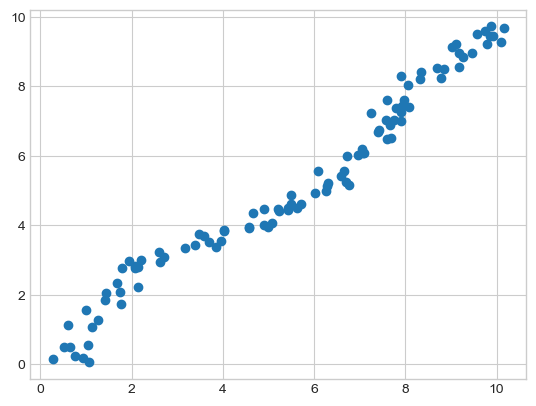

In [44]:
noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise  # 선형의 느낌을 주기 위해 정렬, 약간의 noise 추가
y = sorted(10 * np.random.rand(100))
plt.scatter(X, y);

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 10%를 test용, 90%를 train용

model = LinearRegression() 
model.fit(X_train, y_train) # 학습

LinearRegression()

In [46]:
print("선형 회귀 가중치 : {}" .format(model.coef_)) # 모델 자체에서 return시켜주는 hyper parameter값이 있음. 가중치(w_1)
print("선형 회귀 편향 : {}" .format(model.intercept_)) # 편향(w_0)

''' 
y(w, x) = w_0 + w_1*x_1   --> w_1 : model.coef_, w_0 : model.intercept_
'''

선형 회귀 가중치 : [0.90370862]
선형 회귀 편향 : 0.19045241580469074


' \ny(w, x) = w_0 + w_1*x_1   --> w_1 : model.coef_, w_0 : model.intercept_\n'

In [80]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test))) 

# 평가 데이터가 10%로 더 작기 때문에, 평가 데이터 점수가 더 낮게 나올 확률이 높다

학습 데이터 점수 : 0.6042368591278031
평가 데이터 점수 : 0.6131600824721322


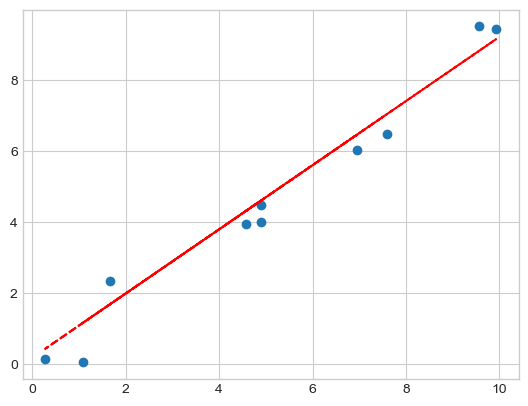

In [48]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r');

# 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성
  
CRIM : 1인당 범죄율 <br>
ZN : 25,000 평방 피트가 넘는 거주지역 토지 비율<br>
INDUS : 자치시별 비소매 상업지역 토지 빙류<br>
CHAS : 찰스 강에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0)<br>
NOX : 10,000,000당 일산화질소 농도<br>
RM : 주택 1가구당 평균 방의 수<br>
AGE : 1940년 이전에 건축된 소유주택 비율<br>
DIS : 5개의 보스톤 고용 센터까지의 가중 거리<br>
RAD : 방사형 고속도로 접근성 지수<br>
TAX : 10,000 달러당 재산 비율<br>
PTRATIO : 자치시별 학생/교사 비율<br>
B : 자치시별 흑인 비율 <br>
LSTAT : 모집단의 하위계층 비율(%)<br>
MEDV : 소유자가 거주하는 주택가격(중앙값)(단위 : 1,000달러)<br>

In [82]:
import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [50]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

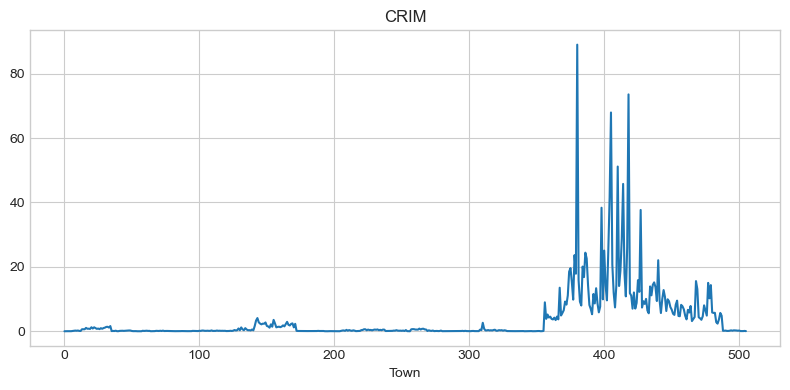

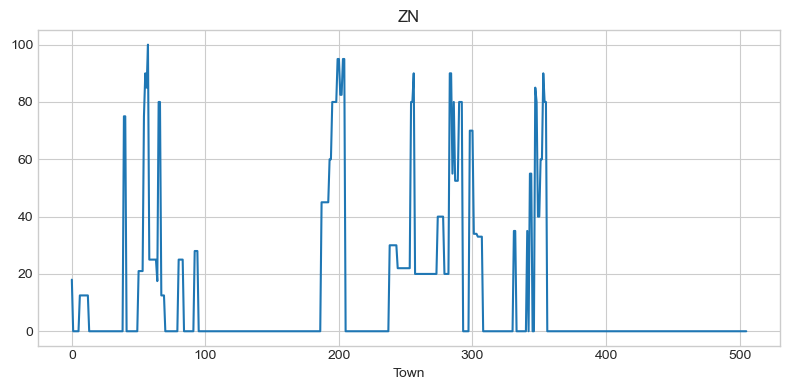

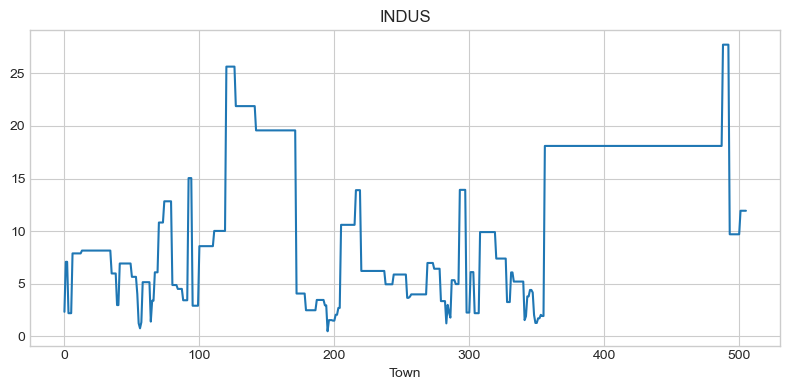

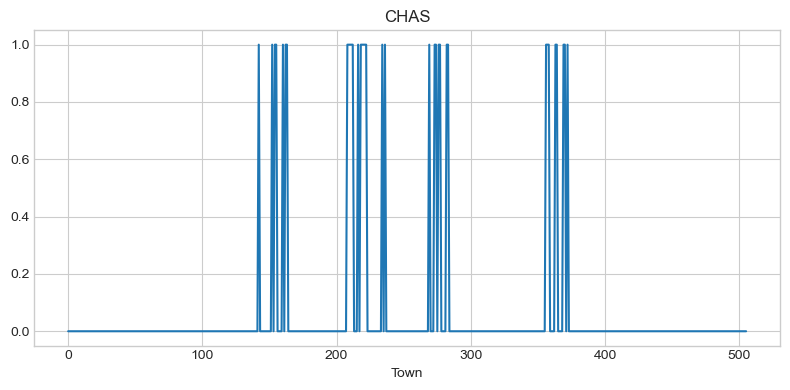

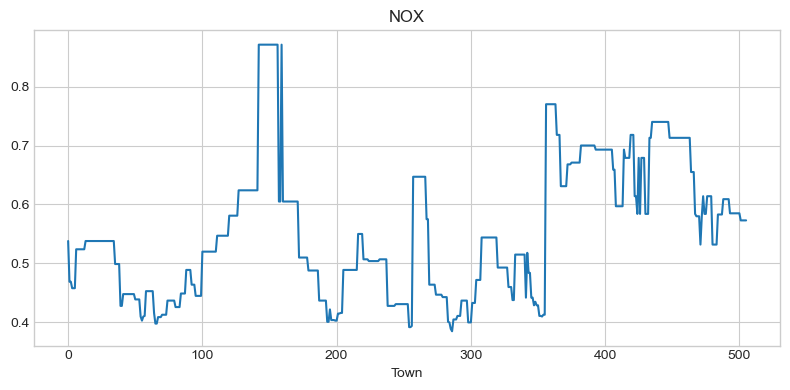

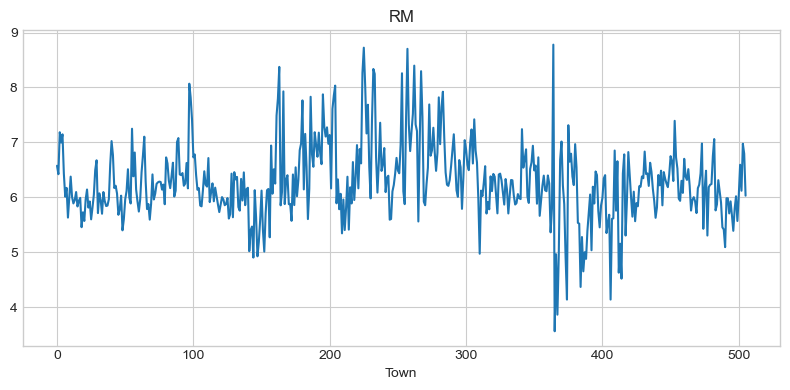

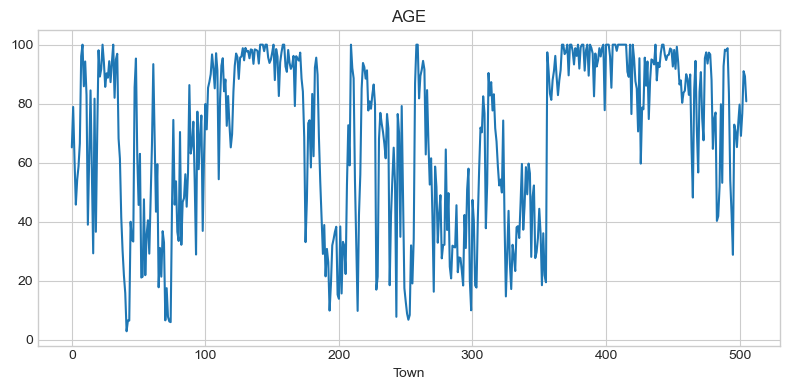

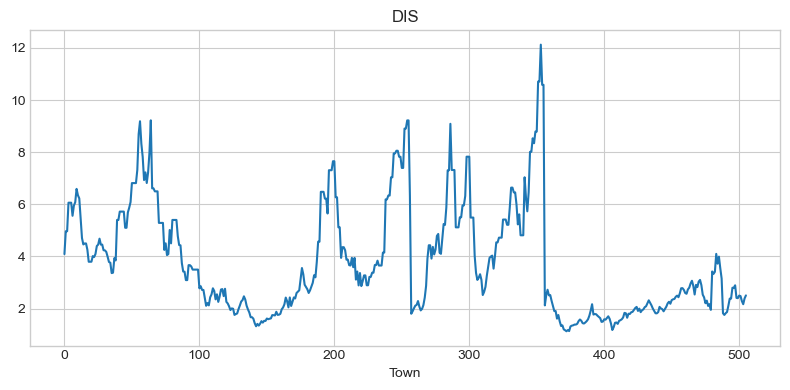

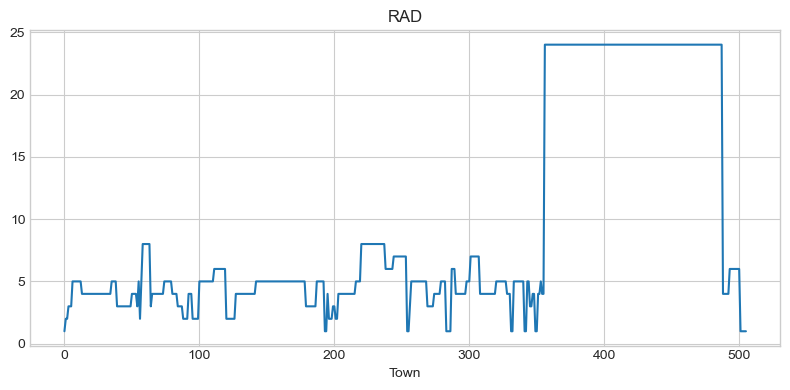

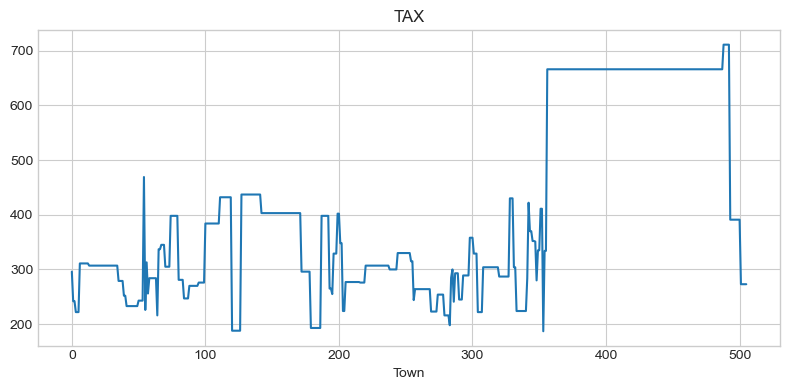

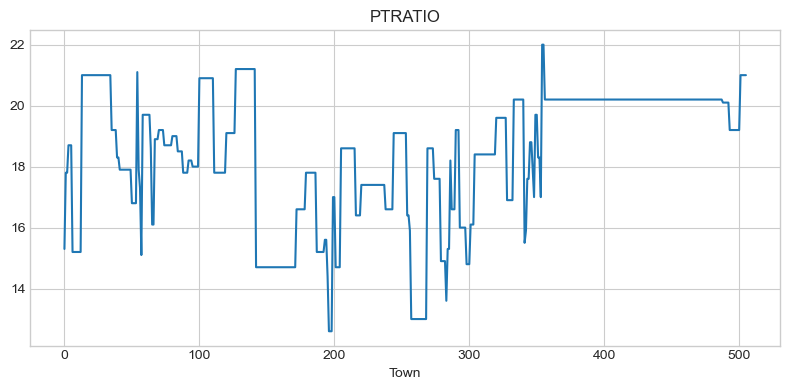

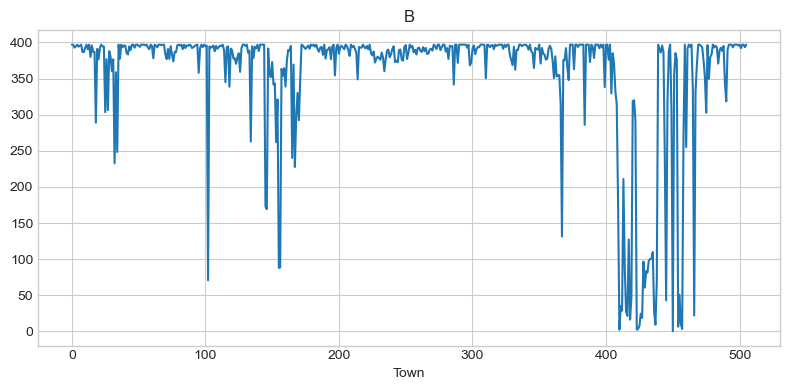

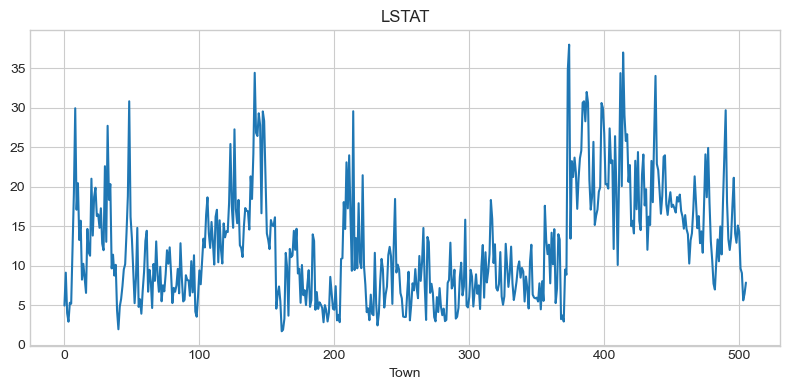

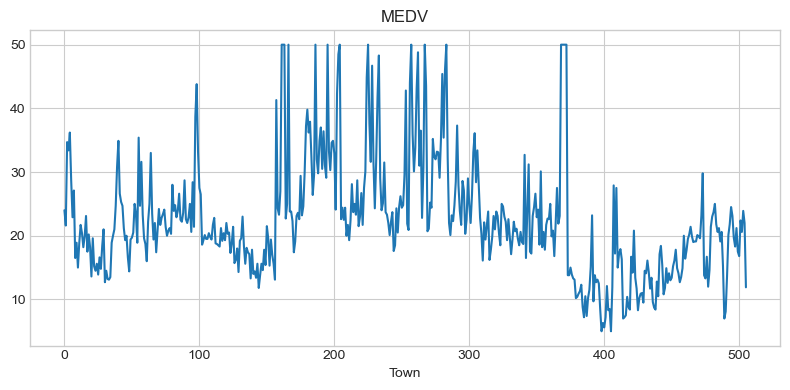

In [51]:
# 어떠한 feature들이 주택 가격과 상관이 있는지 확인하기 위해 시각화
for i, col in enumerate(boston_df.columns) :
    plt.figure(figsize=(8, 4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

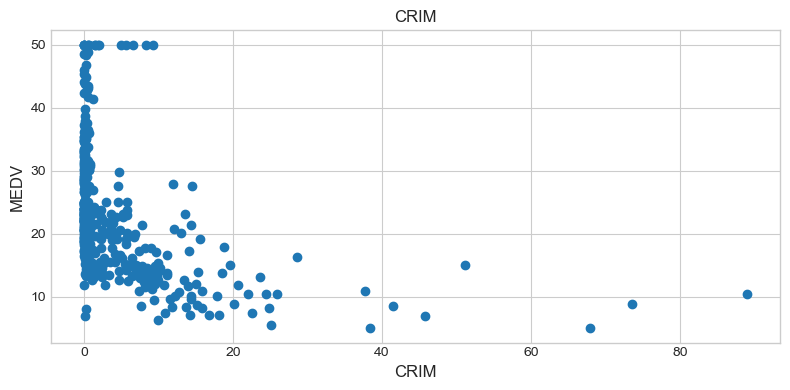

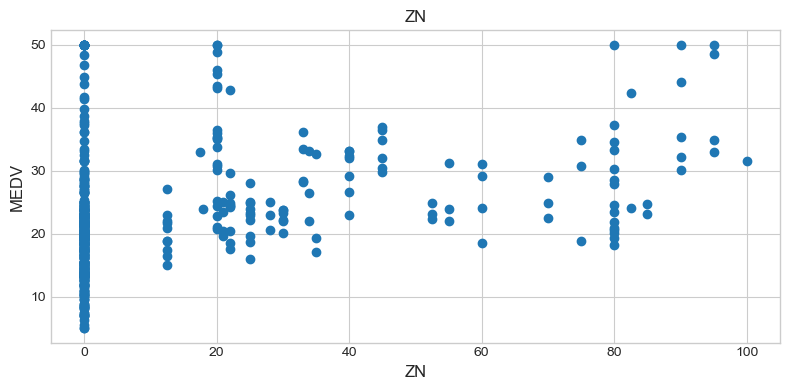

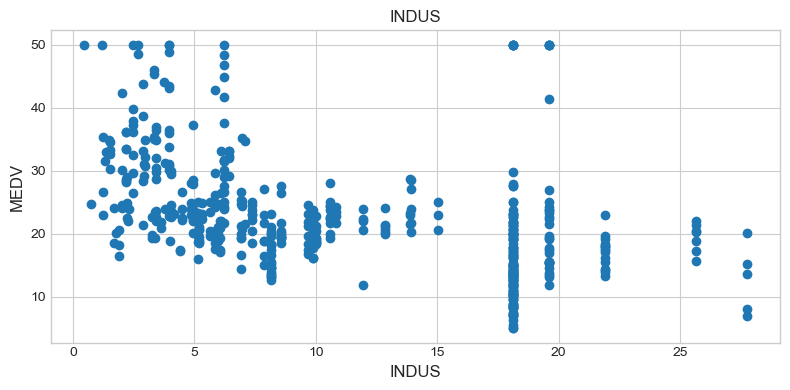

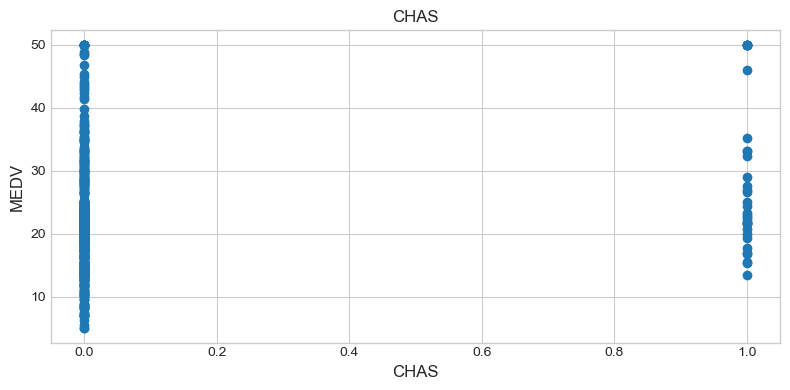

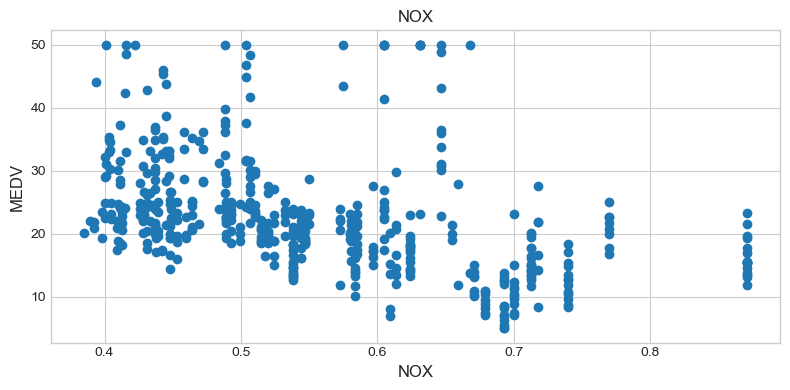

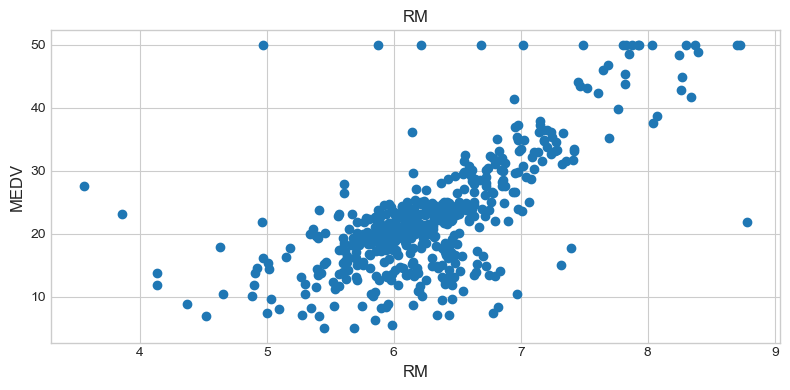

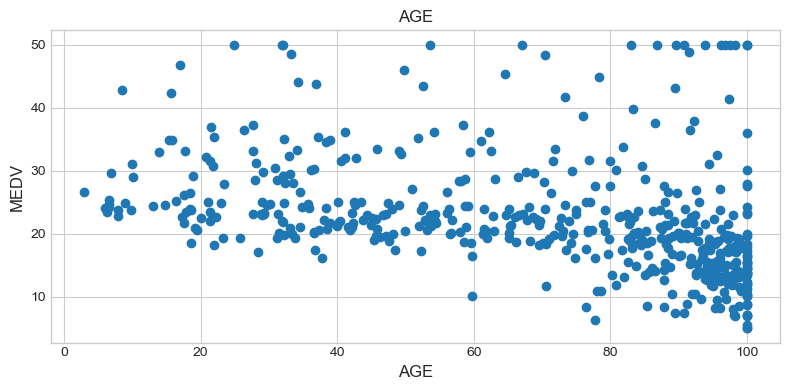

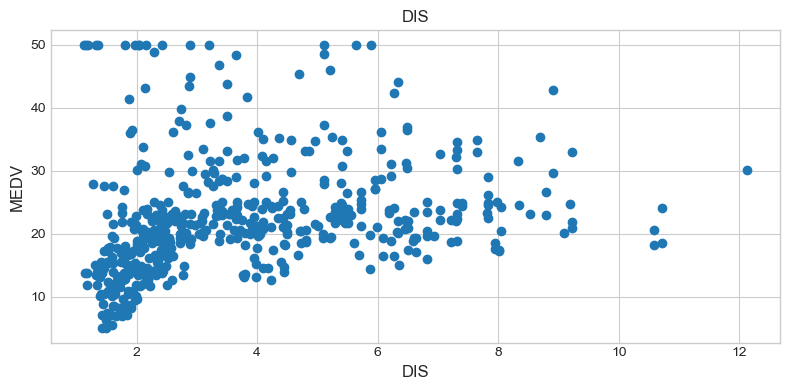

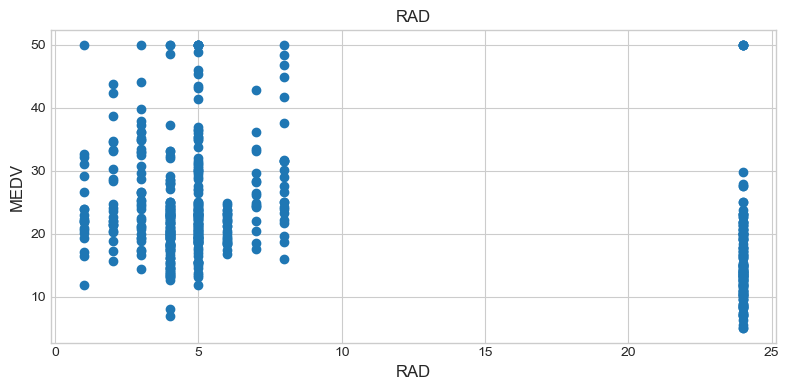

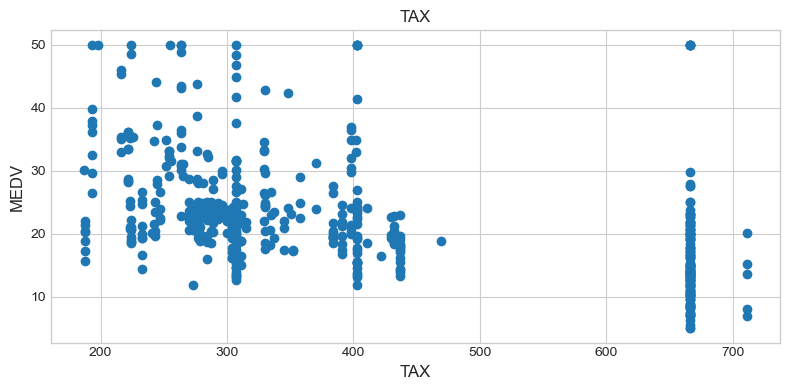

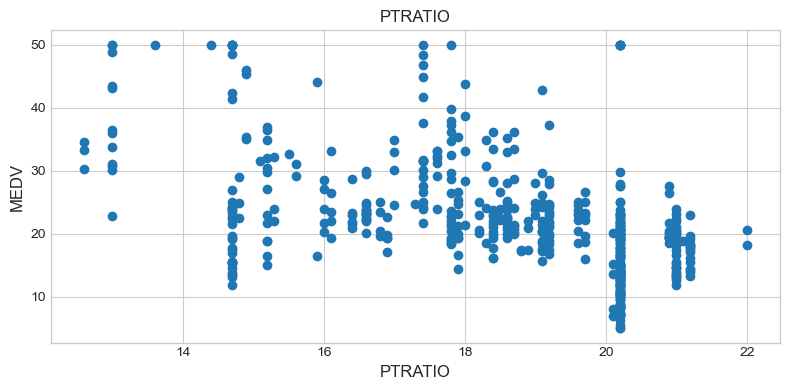

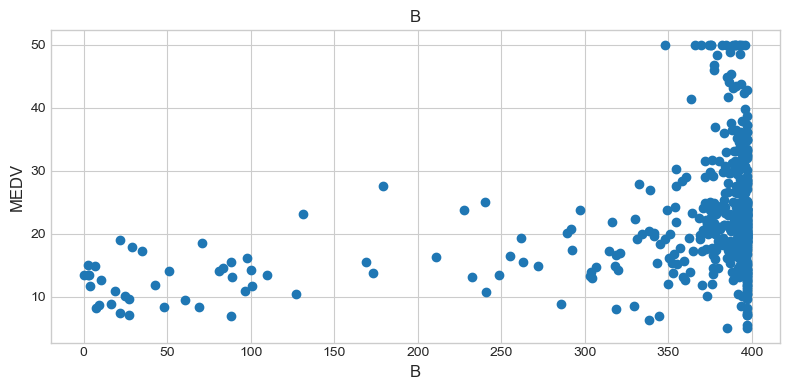

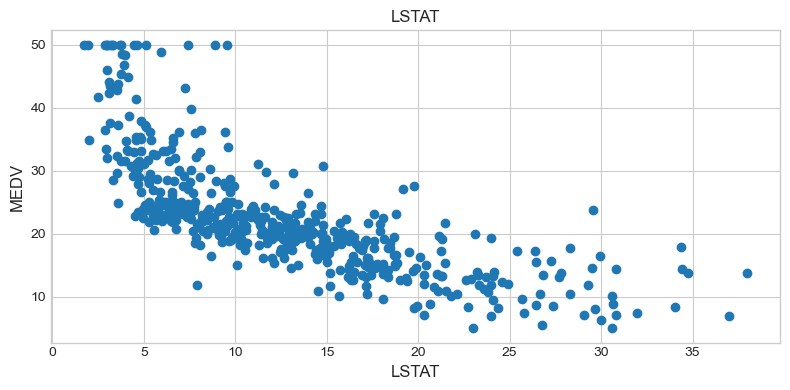

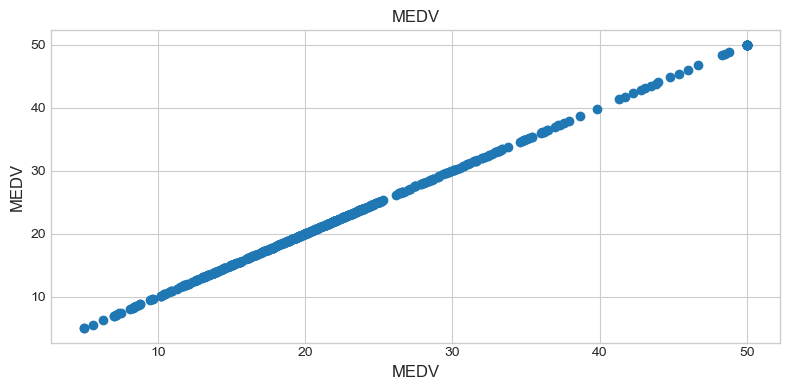

In [52]:
for i, col in enumerate(boston_df.columns) :
    plt.figure(figsize=(8, 4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.title(col)
    plt.xlabel(col, size=12)
    plt.ylabel('MEDV', size=12)
    plt.tight_layout()

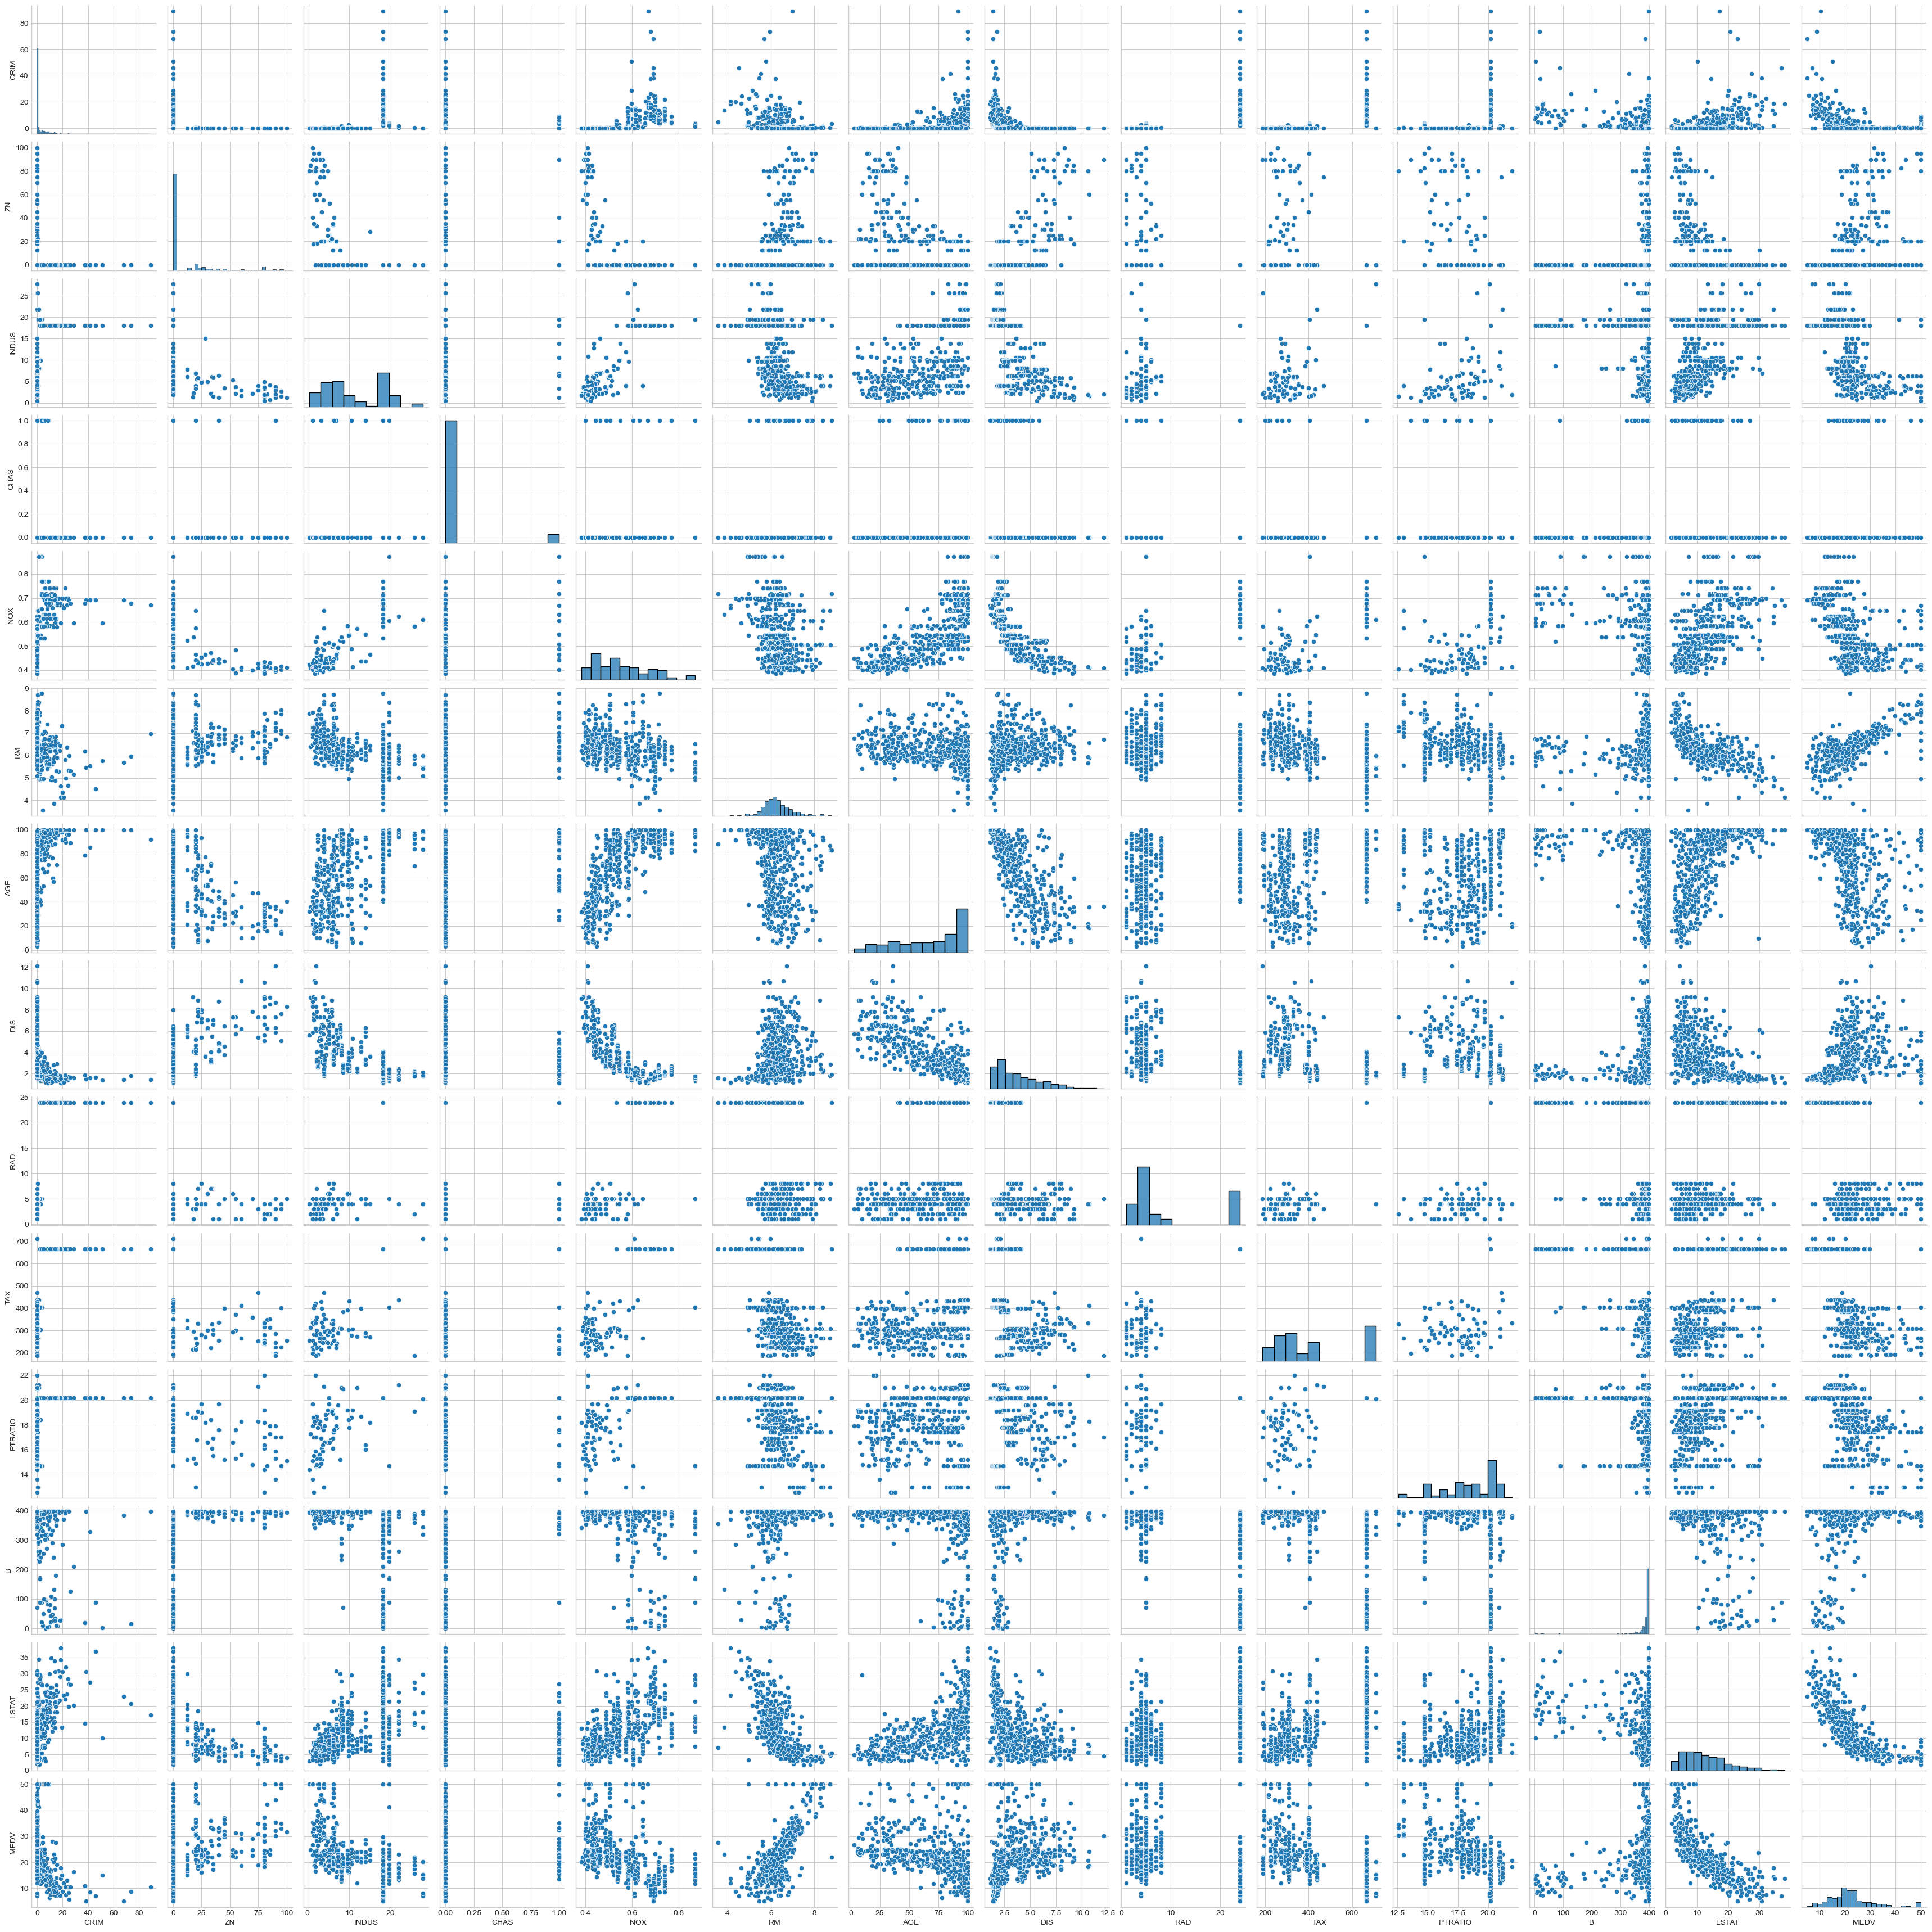

In [53]:
import seaborn as sns

sns.pairplot(boston_df); # 수치형 데이터에 대해서, 각각 Column별로 scatter를 찍어주며 상관관계 분석을 위해 subplot을 모두 찍어준다
                      # 총 13개니까 13 * 13 를 그린다

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()

In [86]:
from sklearn.model_selection import train_test_split
boston_data, boston_target = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target,test_size=0.2)

In [87]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6827140086307151

In [88]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test))) 

학습 데이터 점수 : 0.7513821044557794
평가 데이터 점수 : 0.6827140086307151


## cross_val_score()

* 데이터를 두 개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못딘 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston_df.iloc[:, :-1], boston_df.iloc[:, -1], cv=10, scoring='neg_mean_squared_error')
print("NMSE scores : {}" .format(scores))
print("NMSE scores mean : {}" .format(scores.mean()))
print("NMSE scores std : {}" .format(scores.std()))

NMSE scores : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean : -34.70525594452496
NMSE scores std : 45.573999200308606


## 회귀 평가 지표

- MAE = 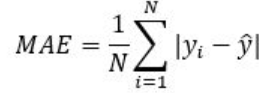 <br>
  실제값과 예측값의 차이를 절댓값 변환 후 평균
- MSE = 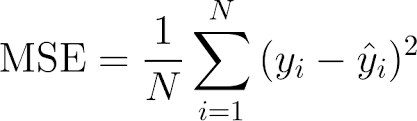 <br>
  실제값과 예측값의 차이를 제곱 후 평균
- RMSE = 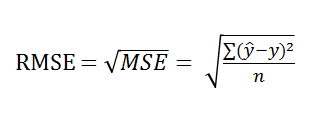 <br>
  MSE의 제곱근
- 결정계수 R-square = $R^2$ = (예측값 Variance) / (실제값 Variance) <br>
  분산 기반으로 예측 성능 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하여 1에 가까울수록 높은 정확도.

In [59]:
r2_scores = cross_val_score(model, boston_data, boston_target, cv=10, scoring='r2')

print("R2 scores : {}" .format(r2_scores))
print("R2 scores mean : {}" .format(r2_scores.mean()))
print("R2 scores std : {}" .format(r2_scores.std()))

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.2025289900605603
R2 scores std : 0.5952960169512184


## 선형 함수로 표현

생성된 회귀 모델에 대해서 평가를 위해 LinearRegression() 객체에 포함된 두 개의 속성 값을 통해
`선형 함수 수식 표현`

$\hat y(w,x) =w_0 + w_1x_1 + ... + w_px_p$

* $x$ : 입력 데이터
* $w$ : 모델이 학습할 파라미터
* $w_0$ : 편향
* $w_1$ ~ $w_p$ : 가중치

intercept_ : 추정된 상수항 == 편향 == $w_0$  <br>
coef_ : 추정된 가중치 벡터 == $w_1$ ~ $w_p$

In [60]:
print("y = " +str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_) :
    print(str(c) + ' * x' + str(i))

y = 26.99066256340042 
-0.10988603467476918 * x0
0.032968849907321574 * x1
0.0031118391782604753 * x2
2.8377819979243926 * x3
-15.008566118607547 * x4
4.684947788100637 * x5
-0.011189278289892648 * x6
-1.3766050718850478 * x7
0.24435596326170833 * x8
-0.01096132987557385 * x9
-0.826881550796756 * x10
0.009583766448746834 * x11
-0.46250996368710157 * x12


## 훈련 데이터에 대한 모델 예측값 평가 점수

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_train_predict)) # root mean square error
r2 = r2_score(y_train, y_train_predict)

# 일반적으로, 회귀에서 RMSE와 R2 score를 많이 비교한다.
print('RMSE : {}' .format(rmse))   # 낮으면 좋다
print("R2 Score : {}" .format(r2)) # 높으면 좋다

RMSE : 4.330324390381253
R2 Score : 0.7724256497227713


## 학습 데이터에 대한 모델 예측값 평가 점수

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) # root mean square error
r2 = r2_score(y_test, y_test_predict)

# 일반적으로, 회귀에서 RMSE와 R2 score를 많이 비교한다.
print('RMSE : {}' .format(rmse))   # 낮으면 좋다
print("R2 Score : {}" .format(r2)) # 높으면 좋다

# test 데이터가 train 데이터보다 더 좋은 훈련 결과가 나왔다

RMSE : 5.98395195478374
R2 Score : 0.6119442860081354


In [63]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## 시각화

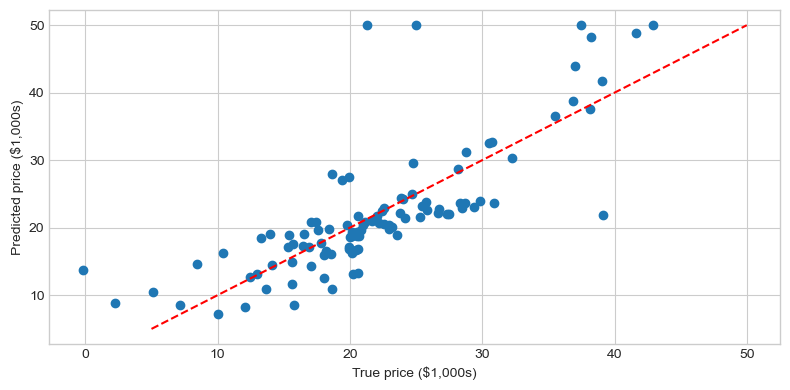

In [64]:
def plot_boston_prices(expected, predicted) :
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], 'r--') # target(MEDV)의 max값 : 50, min값 : 5 니까 
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

# 'r--'에 가까울수록 예측값과 실제값이 같다

# 캘리포니아 주택 가격 데이터
- MedInc       : median income in block group
- HouseAge     : median house age in block group
- AveRooms     : average number of rooms per household
- AveBedrms    : average number of bedrooms per household
- Population   : block group population
- AveOccup     : average number of household members
- Latitude     : block group latitude (위도)
- Longitude    : block group longitude(경도)

In [65]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [66]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [67]:
california_df.describe() 

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

## 데이터 시각화

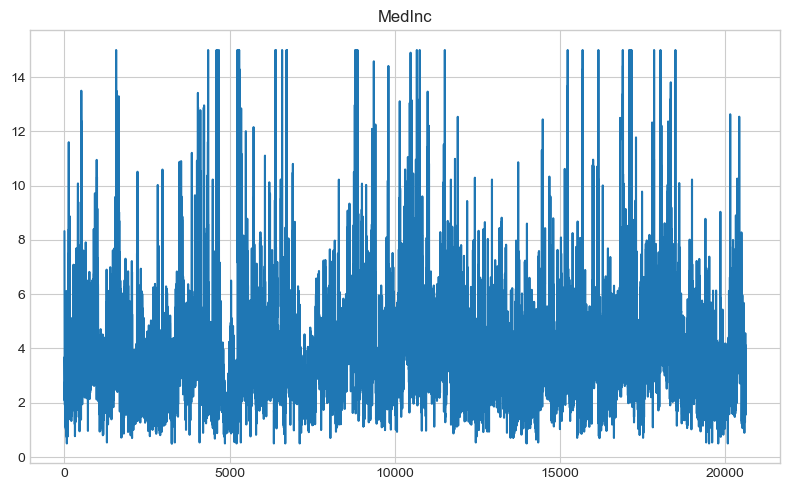

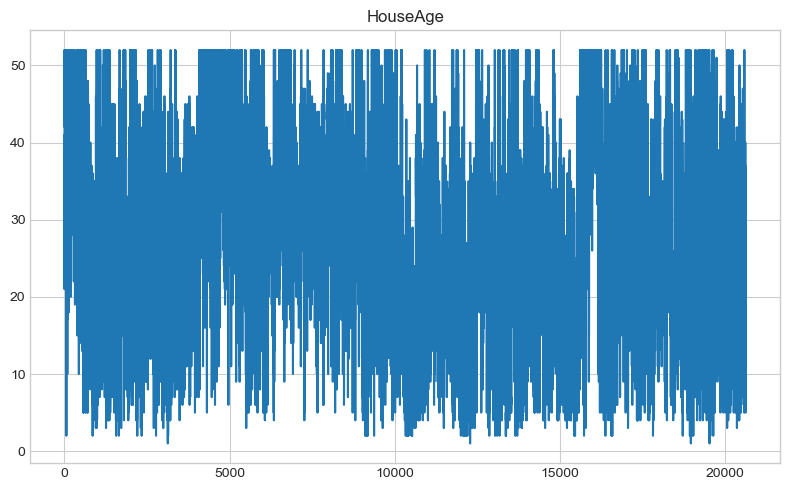

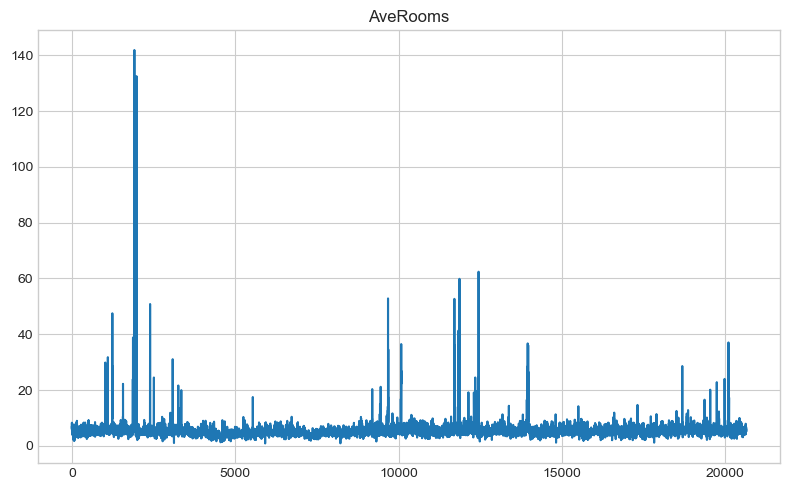

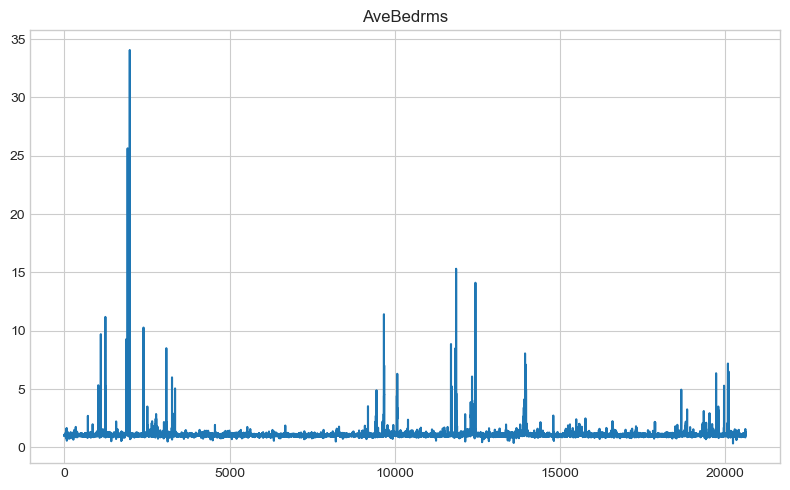

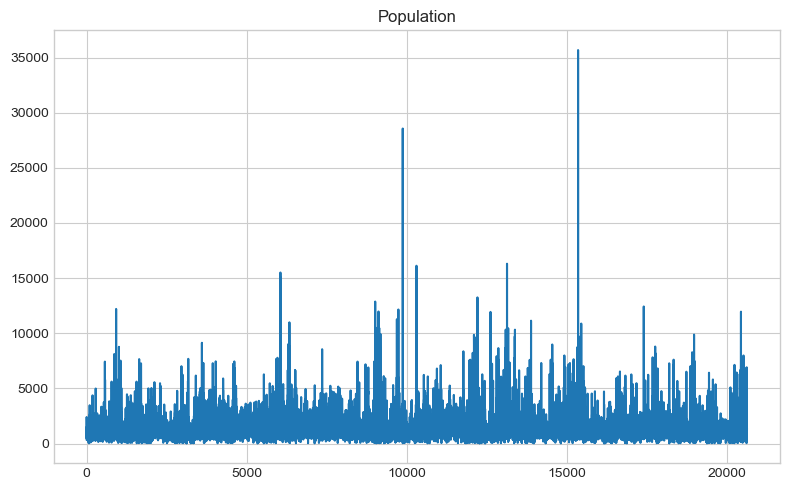

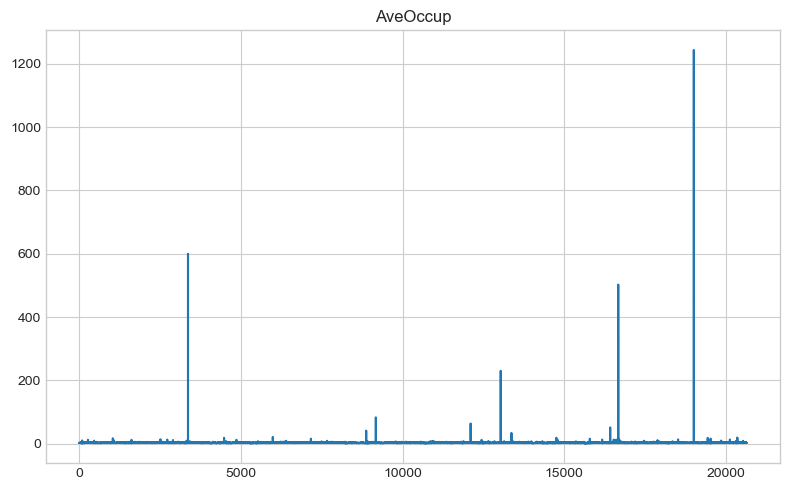

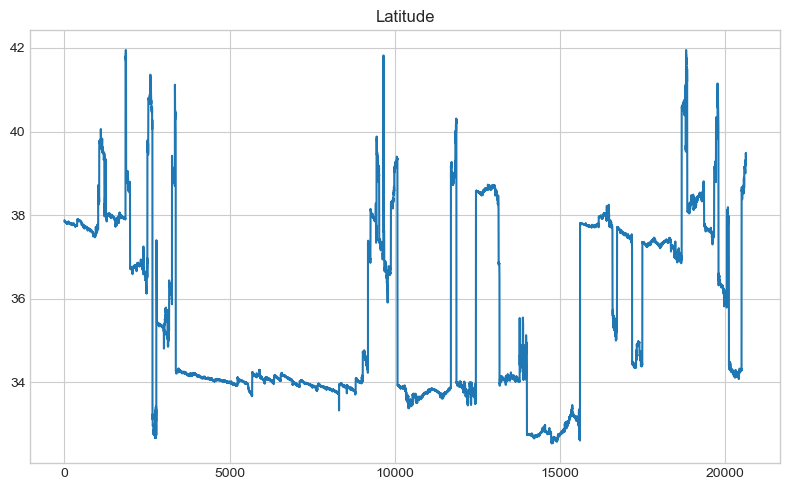

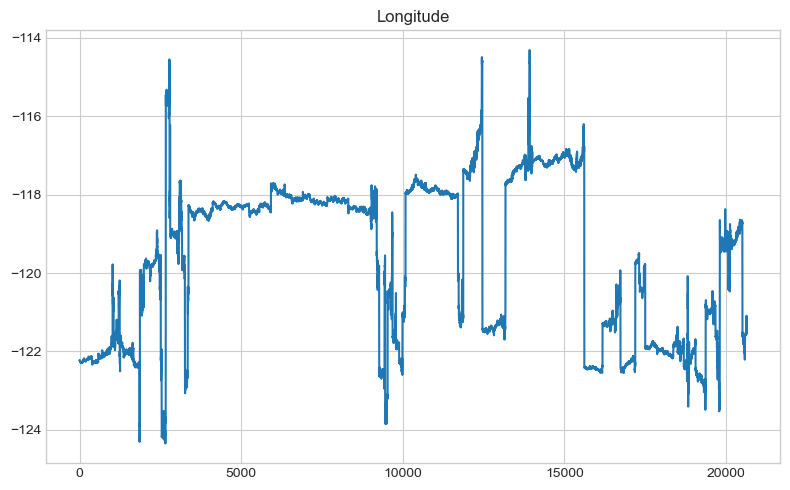

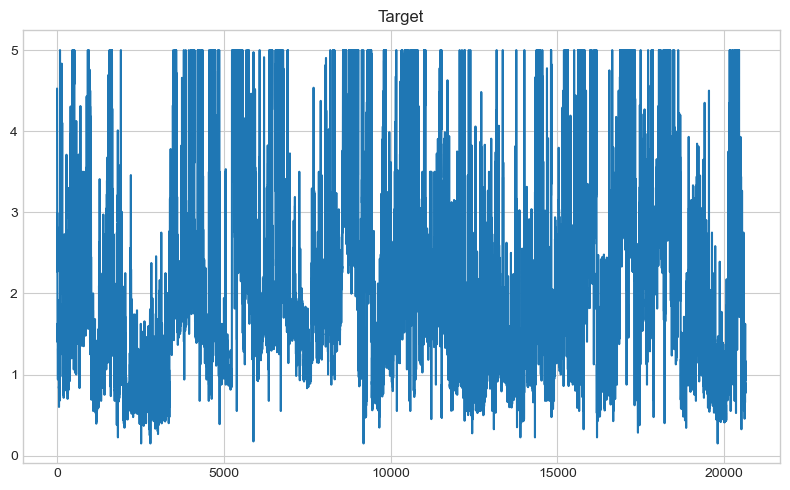

In [68]:
# 시각화
import matplotlib.pyplot as plt 

for i, col in enumerate(california_df.columns) :
    plt.figure(figsize=(8, 5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

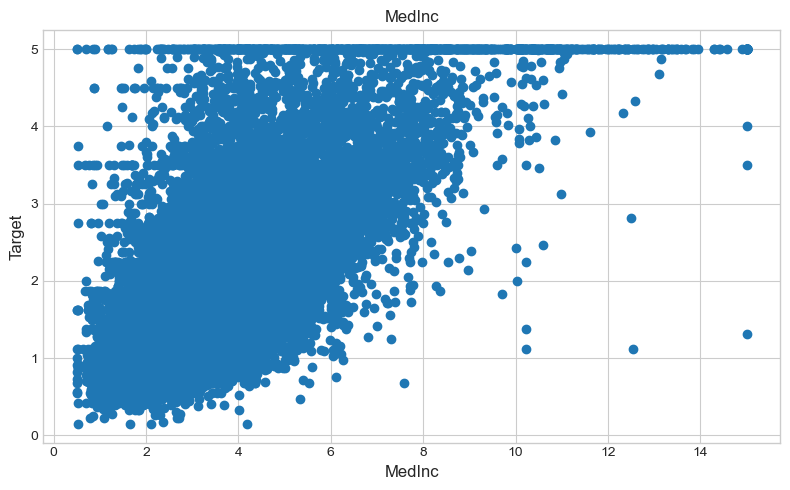

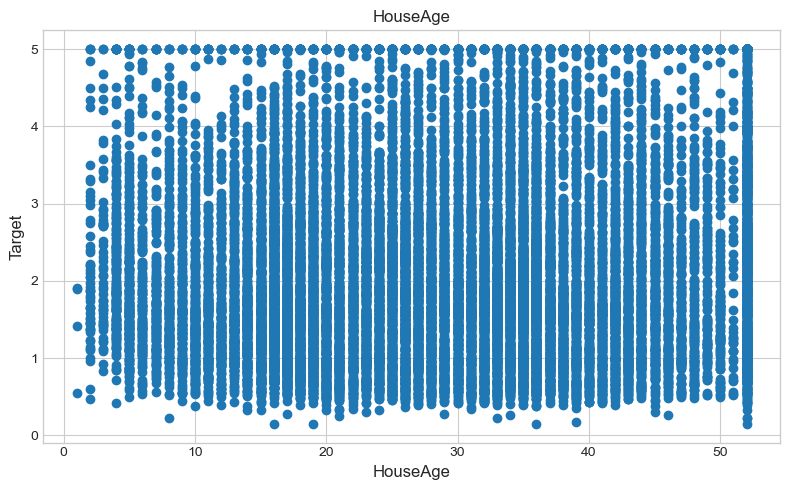

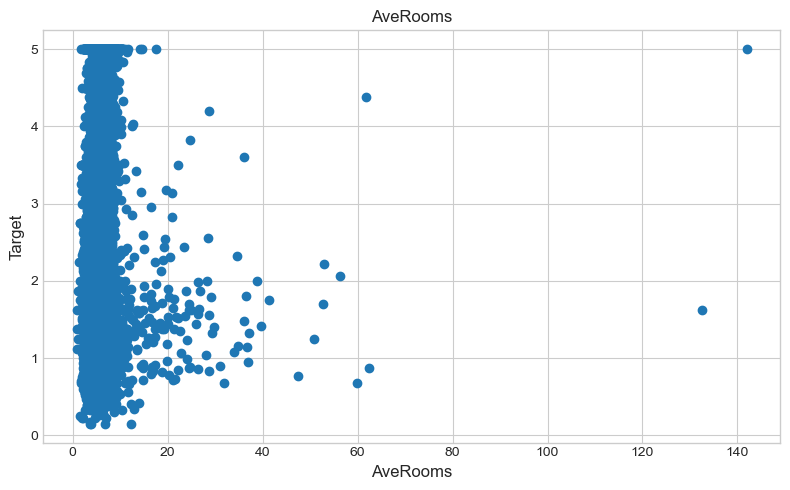

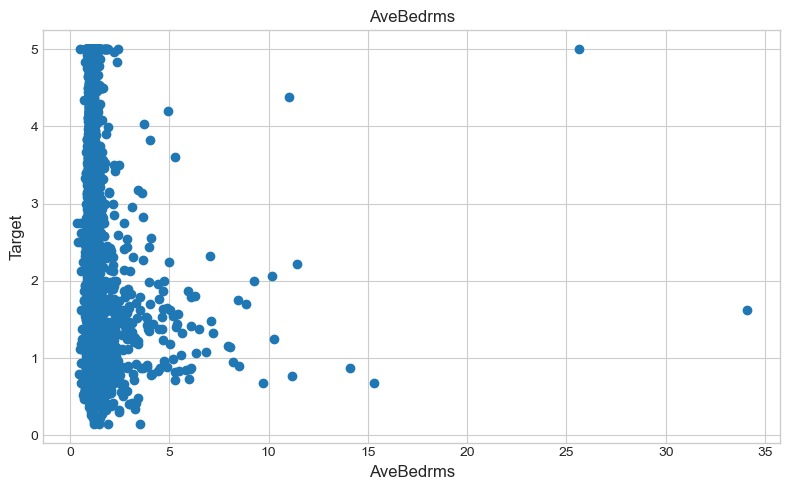

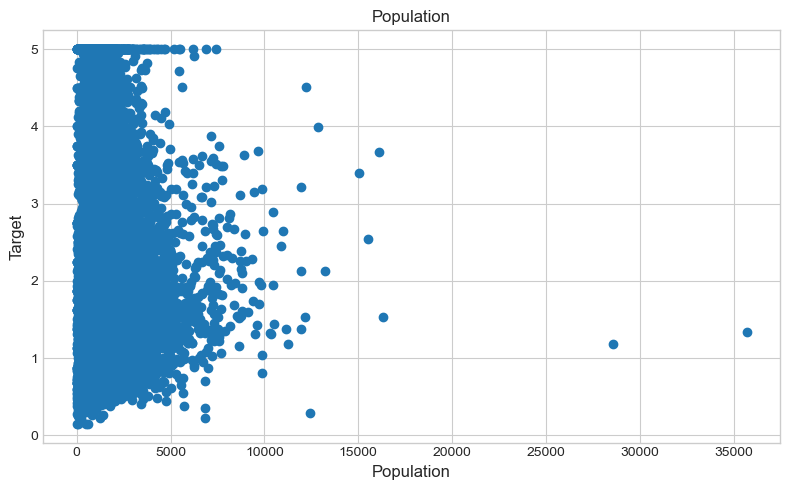

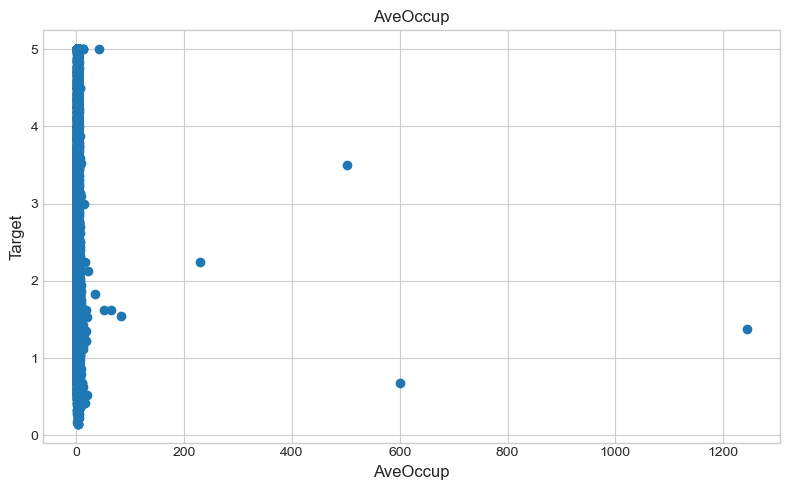

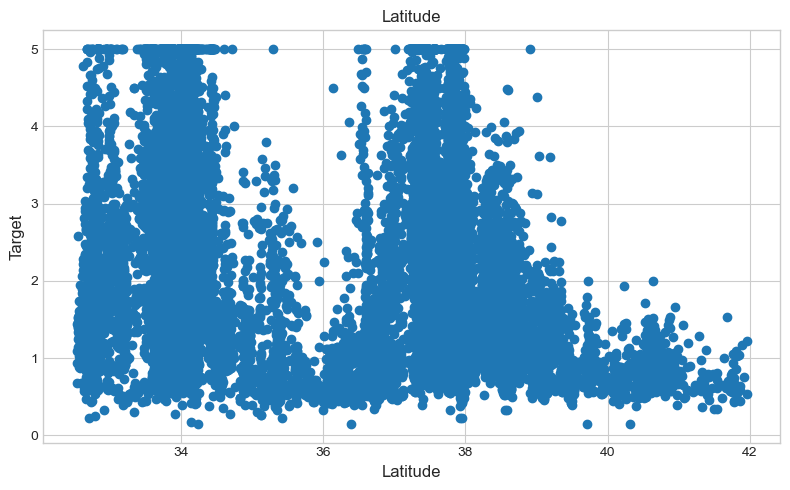

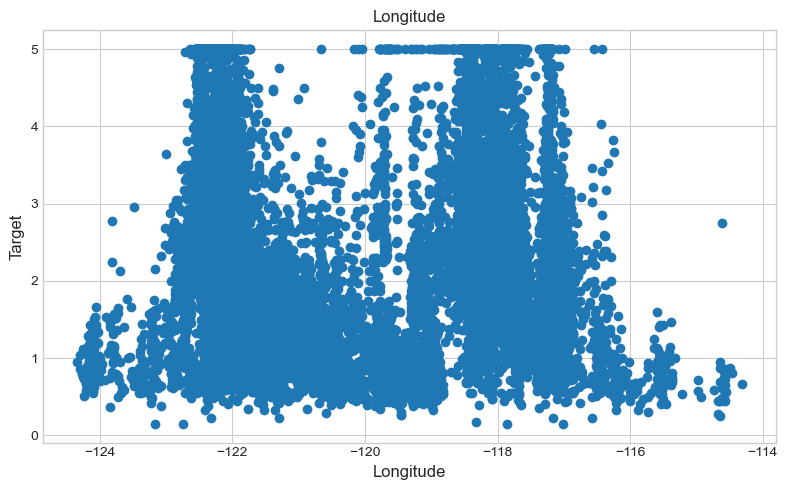

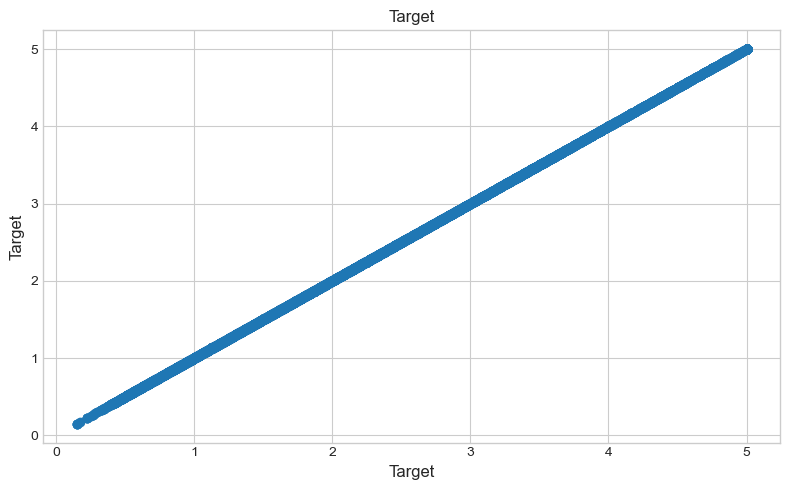

In [69]:
# 시각화
import matplotlib.pyplot as plt 

for i, col in enumerate(california_df.columns) :
    plt.figure(figsize=(8, 5))
    plt.scatter(california_df[col], california_df['Target'])
    plt.xlabel(col, size=12)
    plt.ylabel('Target', size=12) # 주택의 가격
    plt.title(col)
    plt.tight_layout()

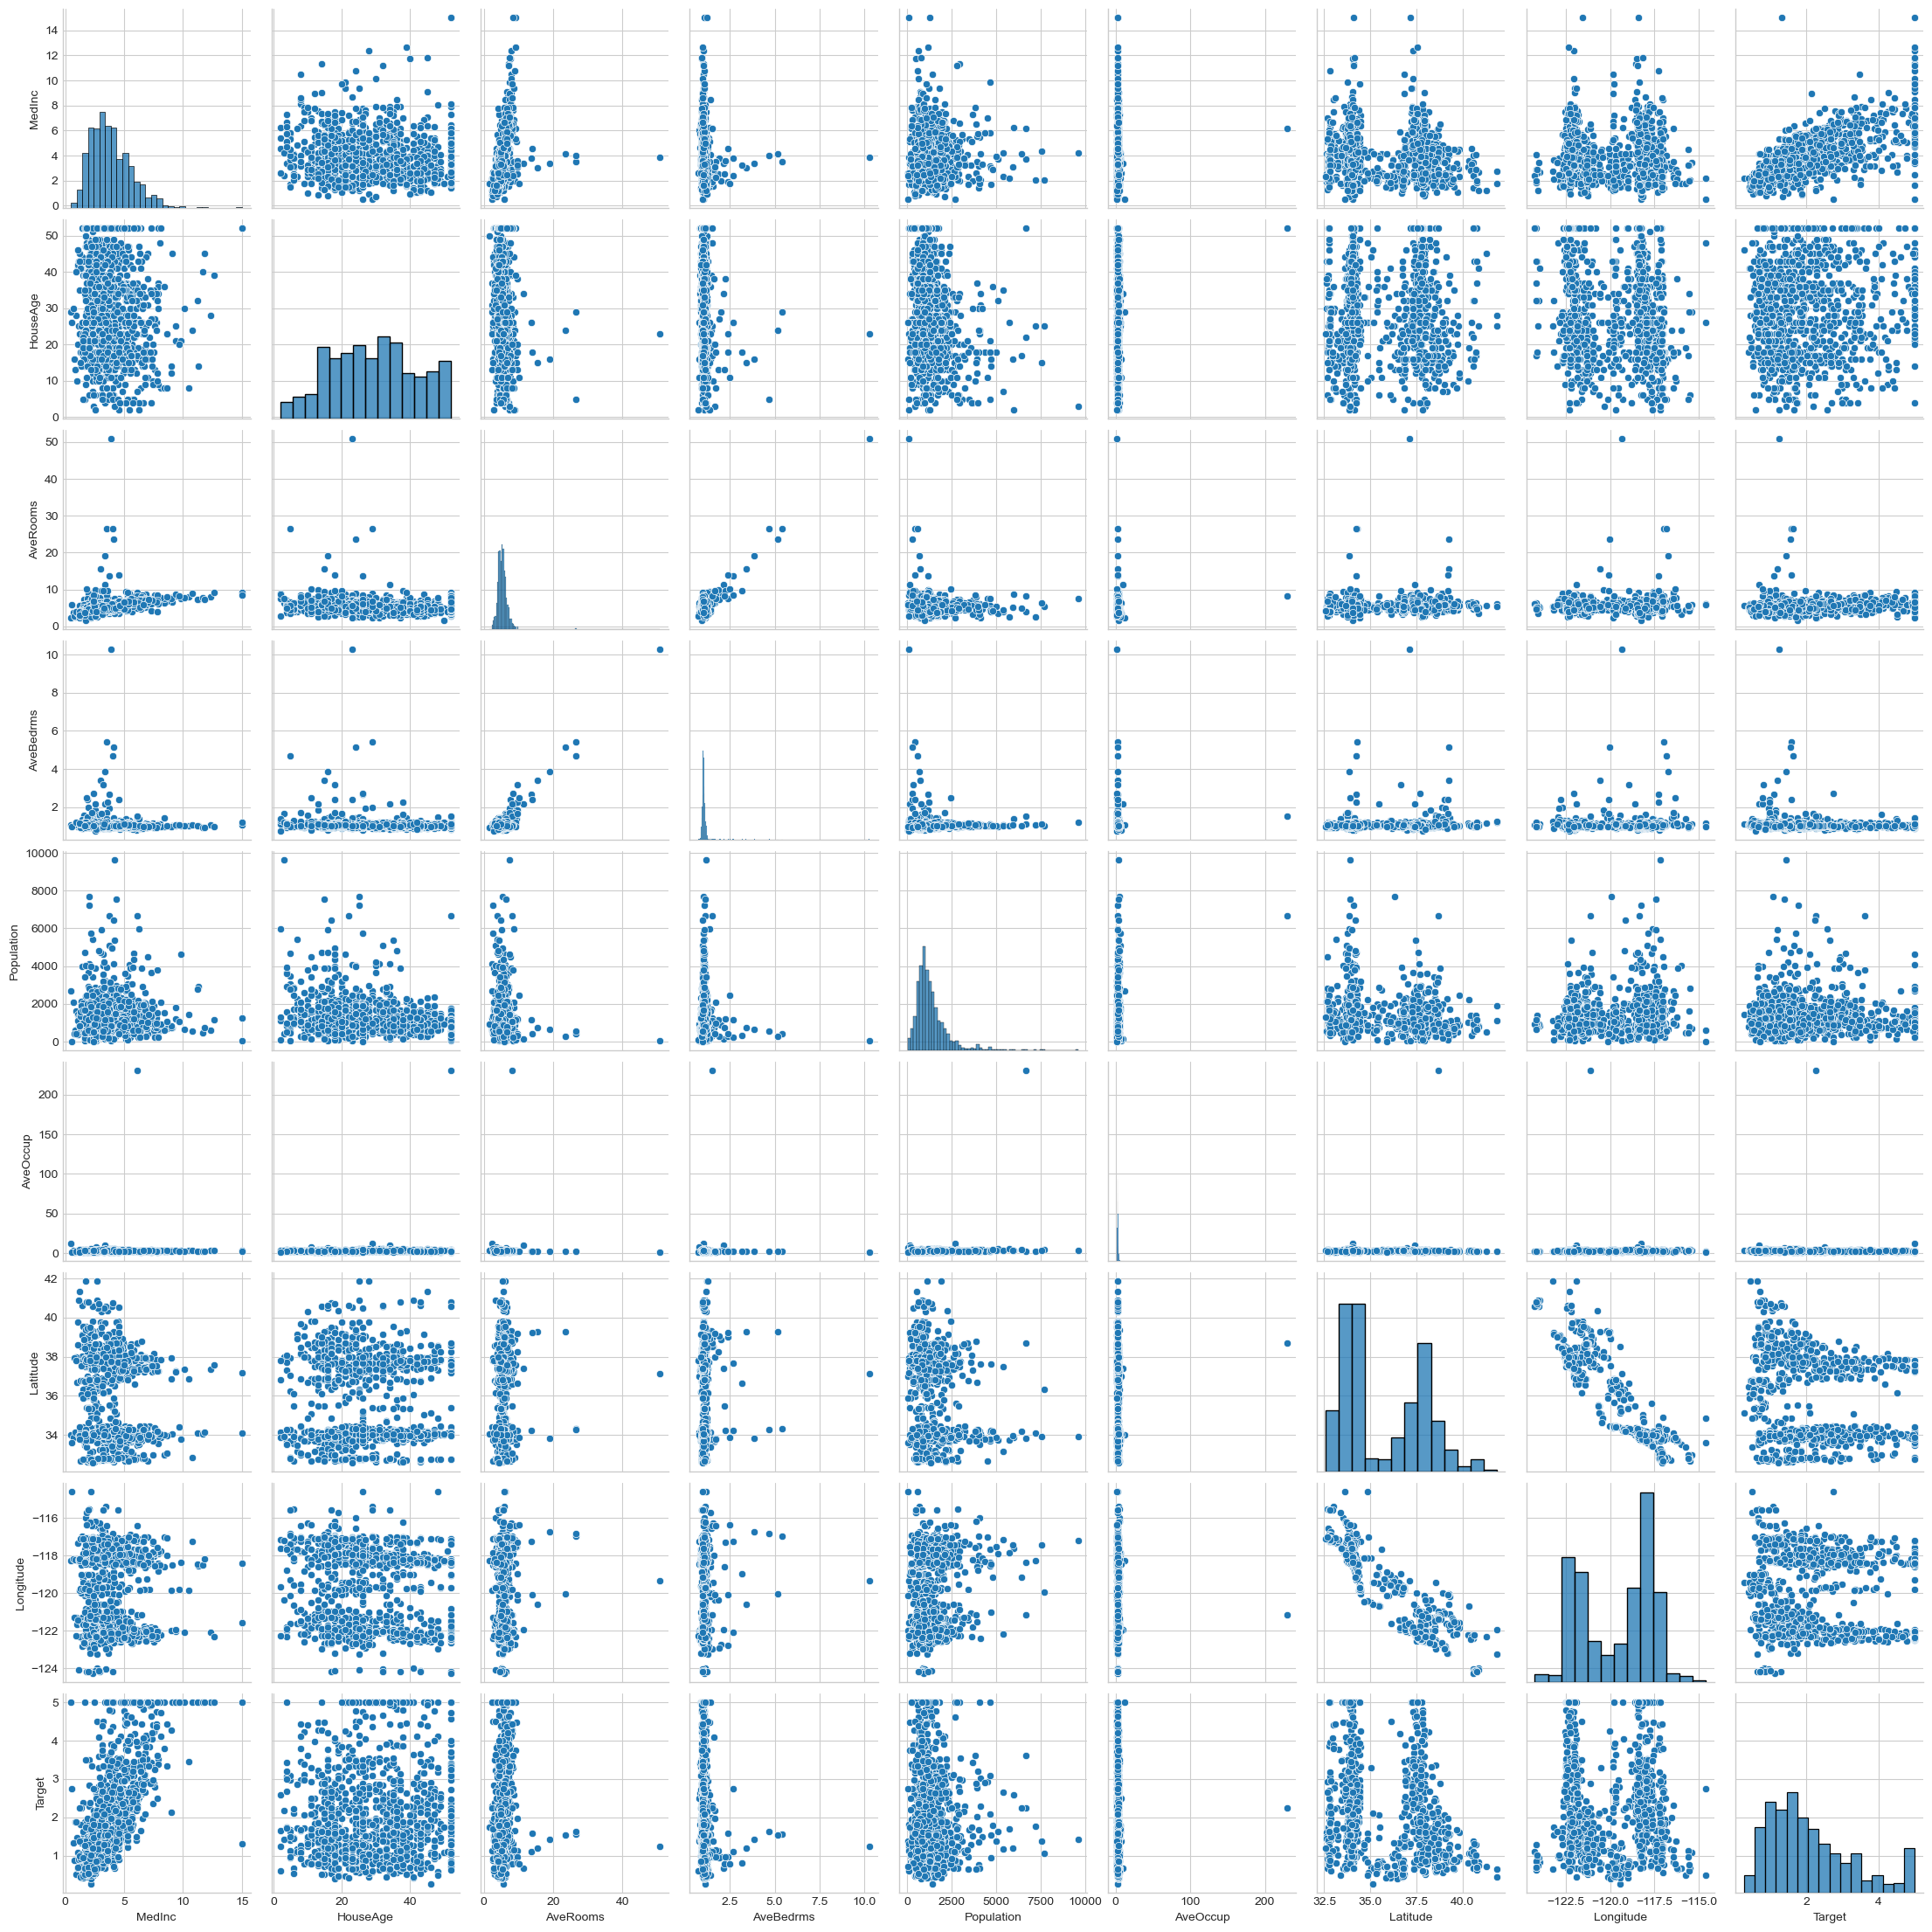

In [70]:
import seaborn as sns

sns.pairplot(california_df.sample(1000)); # data가 20,640개로 너무 많으니까 1,000개만 sampling하여 pairplot

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

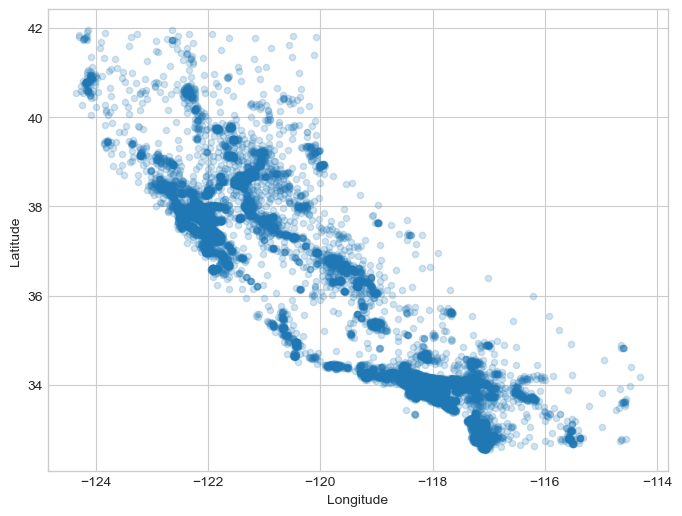

In [71]:
# boston data와 달리 california data에 는 위도, 경도가 있다.
# 위도, 경도를 plot함으로써 위치를 확인할 수 있다.
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(8,6))

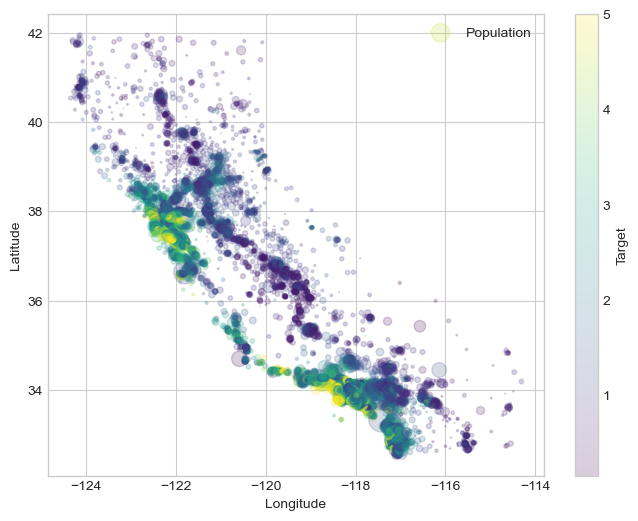

In [72]:
# boston data와 달리 california data에 는 위도, 경도가 있다.

# 위도, 경도를 plot함으로써 위치를 확인할 수 있다.(california 대륙 모양도 확인 가능)
# scatter 크기에 따라서 인구수가 얼마인지 확인
# color에 따라서 주택 가격(Target)이 얼마인지 확인
california_df.plot(
    kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
    s=california_df['Population']/100, label='Population', figsize=(8,6),
    c='Target', cmap=plt.get_cmap('viridis'), colorbar=True
);

## 주택 가격에 대한 선형 회귀

In [73]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)

print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("훈련 데이터 점수 : {}" .format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE mean : {}" .format(scores.mean()))
print("NMSE std : {}" .format(scores.std()))

r2_scoers = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print("R2 Score mean : {}" .format(r2_scores.mean()))

학습 데이터 점수 : 0.6042368591278031
훈련 데이터 점수 : 0.6131600824721322
NMSE mean : -0.5509524296956669
NMSE std : 0.19288582953865197
R2 Score mean : 0.2025289900605603


## 선형 함수로 표현

In [74]:
print("y = " + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_) :
    print(str(c) + ' * x' + str(i))

y = -37.6434805956789 
0.43104257567614357 * x0
0.009007409856238043 * x1
-0.10393653463891224 * x2
0.6294103911972334 * x3
-3.7235890230456846e-06 * x4
-0.0047338617716585615 * x5
-0.4286633012573801 * x6
-0.4428247862207034 * x7


## 훈련 데이터에 대한 모델 예측값 평가 점수

In [75]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("RMSE : {}" .format(rmse))
print("R2 Score : {}" .format(r2))

RMSE : 0.7244830174479229
R2 Score : 0.6042368591278031


## 학습 데이터에 대한 모델 예측값 평가 점수

In [76]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("RMSE : {}" .format(rmse))
print("R2 Score : {}" .format(r2))

RMSE : 0.7232914609007547
R2 Score : 0.6131600824721322


## 시각화

In [77]:
california_df.describe() 

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

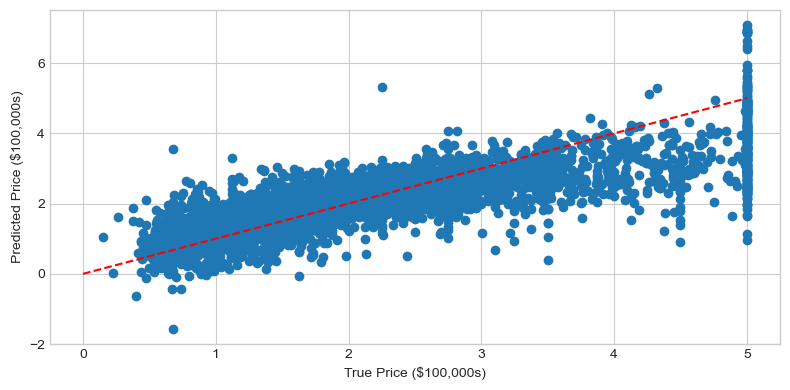

In [78]:
def plot_california_prices(expected, predicted) :
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], 'r--') # Target의 min값 : 0.149, max값 : 5.0
    plt.xlabel("True Price ($100,000s)")
    plt.ylabel("Predicted Price ($100,000s)")
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 3.5 ~ 5 100,000$ 부분에서의 miss가 많아 보임.